In [1]:
#  Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

___
Enter Team Member Names here (double click to edit):

- Name 1:
- Name 2:
- Name 3:

________

# In Class Assignment Five
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (or HTML of the rendered notebook) before the end of class. Be sure to save the notebook before uploading.

<a id="top"></a>
## Contents
* <a href="#testing">Testing R Magics</a>
* <a href="#understand">Understanding the Data Representation</a>
* <a href="#apriori">Finding Frequent Items</a>

** The following will be available during live session: **
* <a href="#candidates">Generating Candidates</a>
* <a href="#arules">Using ARules and ARulesViz</a>

________________________________________________________________________________________________________

<a id="testing"></a>
<a href="#top">Back to Top</a>

## Running in the 'R' Ecosystem with magics
If you did not get Rpy2, R, or the dependencies arules and arulesViz installed on your system, then you will need to skip this part and go on to the first question. You will need to run the appropriate block of code in this notebook depending on if you have Rpy2 running or not. Each block is marked appropriately, so read the block before running it. 

In [2]:
# getting things started
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
#==========================
#IF USING R, RUN THIS CODE
#==========================
# You will need to have R installed, as well as Rpy2 and the arules library
from rpy2.robjects.packages import importr
from rpy2 import robjects as robj

# this way we can write r code by simply writing %R
%load_ext rmagic
%load_ext rpy2.ipython 
# this enables the %R extension to iPython (does not work outside of the iPython shell)

# these packages will need to be installed
# open R and run 
#     install.package(arules)
#     install.package(arulesViz)

arules = importr('arules') # same as importing in R with the "library" command
arules_viz = importr('arulesViz') # visualize the different rules

/Library/Python/2.7/site-packages/IPython/extensions/rmagic.py:11: UserWarning: The rmagic extension in IPython has moved to `rpy2.ipython`, please see `rpy2` documentation.
  warnings.warn("The rmagic extension in IPython has moved to "


If you receive a warning on the above block, try to run it again and verify that everything is loaded properly.
___


Parameter specification:
 confidence minval smax arem  aval originalSupport support minlen maxlen target
        0.8    0.1    1 none FALSE            TRUE    0.05      2     10  rules
   ext
 FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

apriori - find association rules with the apriori algorithm
version 4.21 (2004.05.09)        (c) 1996-2004   Christian Borgelt
set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[10 item(s), 2201 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [49 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


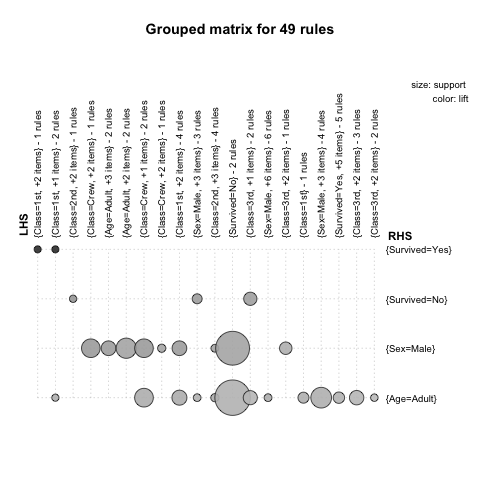

Arules run now from R, test complete


In [4]:
#==========================
#IF USING R, RUN THIS CODE
#==========================

%R load("titanic2.raw.rdata")
%R rules <- apriori(titanic.raw,parameter = list(minlen=2, supp=0.05, conf=0.8))
%R rules.sorted <- sort(rules, by="lift")
%R plot(rules.sorted, method="grouped")

print('Arules run now from R, test complete')

___
<a id="understand"></a>
<a href="#top">Back to Top</a>
## Understanding the dataset
We have used the titanic dataset before in class, however this dataset has been pruned to only include the social class, sex, age (as a nominal), and if the individual survived. The data can be stored in many ways, but is stored here as a table of values. 

**Question**: Is this dataset a typical example of *transaction* data (*i.e.*, like the grocery store transaction data)? Why or Why not? What makes it similar or different? **Hint**: think about the possible itemset lattice and how it might be different/similar. What makes an item in this dataset?

___
Enter your answer here:

*Double Click to Edit*



___

<a id="apriori"></a>
<a href="#top">Back to Top</a>
## Frequent Itemsets and Apriori
Run the following line of code to grab the R loaded data.frame and save it into a pandas dataframe. 

Please run the appropriate block of code for whether you have Ry2 installed or not!

In [5]:
#==========================
#IF USING R, RUN THIS CODE
#==========================
# Use rmagics to save the dataframe into pandas
#(R output)(python var) ( this is all R code)
%R -o df_from_R df_from_R <- titanic.raw

# now we have the exact same dataset as the one from R
# but it is now a pandas dataframe
print(df_from_R.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2201 entries, 1 to 2201
Data columns (total 4 columns):
Class       2201 non-null object
Sex         2201 non-null object
Age         2201 non-null object
Survived    2201 non-null object
dtypes: object(4)
memory usage: 86.0+ KB
None


In [6]:
#===============================
# IF NOT USING R RUN THIS CODE
#===============================
# getting things started
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

df_from_R = pd.read_csv('Rframe_as_pandas.csv')
df_from_R.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2201 entries, 0 to 2200
Data columns (total 5 columns):
Unnamed: 0    2201 non-null int64
Class         2201 non-null object
Sex           2201 non-null object
Age           2201 non-null object
Survived      2201 non-null object
dtypes: int64(1), object(4)
memory usage: 103.2+ KB


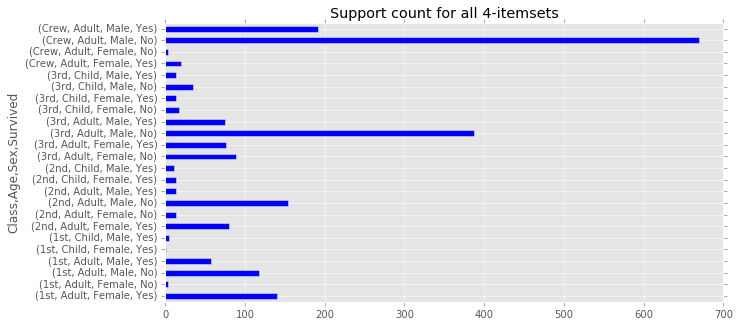

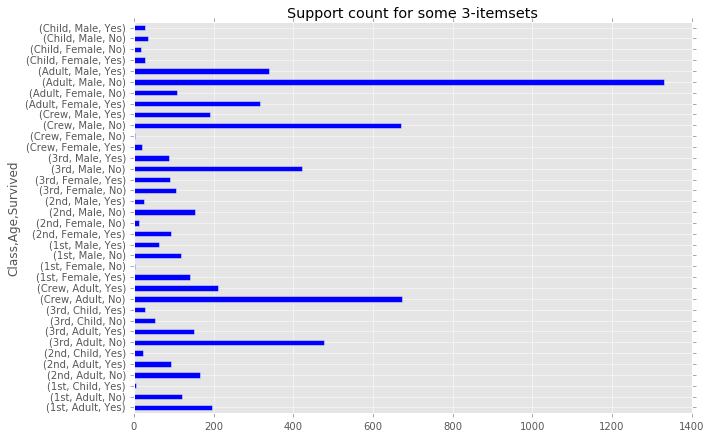

In [7]:
#==========================================
# RUN THIS CODE NO MATTER IF USING R OR NOT
#==========================================
plt.style.use('ggplot')

# Now lets plot the number of times each itemset occurs graphically
# find counts of the four itemsets
f = plt.figure(figsize=(10,5))
df_grouped = df_from_R.groupby(by=['Class','Age','Sex'])
ax = df_grouped.Survived.value_counts().plot(kind='barh')
plt.title('Support count for all 4-itemsets')

# find all the three itemsets and concat them
f = plt.figure(figsize=(10,7))
df_grouped = df_from_R.groupby(by=['Class','Age'])
countsA = df_grouped.Survived.value_counts()
df_grouped = df_from_R.groupby(by=['Class','Sex'])
countsB = df_grouped.Survived.value_counts()
df_grouped = df_from_R.groupby(by=['Age','Sex'])
countsC = df_grouped.Survived.value_counts()

pd.concat((countsA,countsB,countsC)).plot(kind='barh')
plt.title('Support count for some 3-itemsets')



Use the graphs above to estimate the values for the following quantities. You do not need to calculate counts from the dataset, just try to get close by viewing from the graph. Recall that for a given rule, $X\rightarrow Y$, the confidence is given by 
$$c=\frac{\sigma( X \cup Y)}{\sigma( X )} $$

**Questions**: Given the graphs above, what is the support count, $\sigma$, and support, $s$, for the itemset {1st, Adult, Yes}? What about the itemset {1st, Adult, Yes, Female}?

**Question**: What is the confidence, $c$, for the rule {1st, Adult, Yes} $\rightarrow$ {Female}? 

___
Enter your answer here:

*Double Click to Edit*




In [8]:
# Insert any calculations needed to answer the above question here


___
**Question**: What is the support count (an integer) for a *minsup* threshold of 0.25? Using the support count graphs above, which itemsets would be considered frequent with a *minsup* of 0.25? Are any of the 4-itemsets also maximal for this value of *minsup*? Why or Why not?

___
Enter your answer here:

*Double Click to Edit*




In [9]:
# Insert any calculations needed to answer the above question here